# Exploratory Data Analysis

In [1]:
import os
print(f"Current working directory: {os.path.basename(os.getcwd())}")

# Change to root directory
os.chdir("../")
print(f"Current working directory (Changed): {os.path.basename(os.getcwd())}")

Current working directory: notebooks
Current working directory (Changed): Wine-Quality-Predictor


In [2]:
# Imports
from src.constants import DATA_CONFIGS, DATA_SCHEMA
from src.utils.common import read_yaml
from os.path import normpath, join

In [3]:
configs = read_yaml(DATA_CONFIGS).data_preparation
schema = read_yaml(DATA_SCHEMA)

[2024-01-26 12:23:07 PM]:ProjectLogger INFO: common 32 - yaml file: conf\data_configs.yaml loaded successfully
[2024-01-26 12:23:07 PM]:ProjectLogger INFO: common 32 - yaml file: conf\schema.yaml loaded successfully


In [4]:
raw_filepath = join(normpath(configs.raw_dir), configs.raw_filename)
print(f"The raw datafile is: {raw_filepath}")

The raw datafile is: data\raw\wine_data.csv


In [5]:
#imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

# module setup
%matplotlib inline
pd.options.display.precision = 3
warnings.filterwarnings("ignore")

In [6]:
# import helper functions

from src.utils.eda_utils import dataframe_structure, dict_to_table, datatype_details
from src.utils.eda_utils import regression_metrics

In [7]:
# import data from csv
wine_quality_data = pd.read_csv(raw_filepath)

# shuffling and creating a copy of it for working
wine_df = wine_quality_data.copy(deep=True).sample(frac=1, random_state=42).reset_index(drop=True)

# view the glimpse of the dataframe
wine_df.head()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality,color
0,7.0,0.17,0.74,12.8,0.045,24.0,126.0,0.994,3.26,0.38,12.2,8,white
1,7.7,0.64,0.21,2.2,0.077,32.0,133.0,0.996,3.27,0.45,9.9,5,red
2,6.8,0.39,0.34,7.4,0.020,38.0,133.0,0.992,3.18,0.44,12.0,7,white
3,6.3,0.28,0.47,11.2,0.040,61.0,183.0,0.996,3.12,0.51,9.5,6,white
4,7.4,0.35,0.20,13.9,0.054,63.0,229.0,0.999,3.11,0.50,8.9,6,white


In [8]:
# get the dataframe structure details
df_structure = dataframe_structure(dataframe=wine_df)

# prettify the dictionary response
tbl = dict_to_table(input_dict=df_structure,
                    column_headers=["Dataframe Attributes", "Value"])

# show table
print(tbl)

+----------------------+------------+
| Dataframe Attributes | Value      |
+----------------------+------------+
| Dimensions           | 2          |
| Shape                | (6497, 13) |
| Row Count            | 6497       |
| Column Count         | 13         |
| Total Datapoints     | 84461      |
| Null Datapoints      | 0          |
| Non-Null Datapoints  | 84461      |
| Total Memory Usage   | 1023456    |
| Average Memory Usage | 73104.0    |
+----------------------+------------+


In [9]:
# get field details
wine_df.info(memory_usage ='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed_acidity         6497 non-null   float64
 1   volatile_acidity      6497 non-null   float64
 2   citric_acid           6497 non-null   float64
 3   residual_sugar        6497 non-null   float64
 4   chlorides             6497 non-null   float64
 5   free_sulfur_dioxide   6497 non-null   float64
 6   total_sulfur_dioxide  6497 non-null   float64
 7   density               6497 non-null   float64
 8   pH                    6497 non-null   float64
 9   sulphates             6497 non-null   float64
 10  alcohol               6497 non-null   float64
 11  quality               6497 non-null   int64  
 12  color                 6497 non-null   object 
dtypes: float64(11), int64(1), object(1)
memory usage: 999.5 KB


In [10]:
# get details of teh datatypes
datatype_details(wine_df)

There are 1 fields with int64 datatype
There are 1 fields with object datatype
There are 11 fields with float64 datatype


In [11]:
# creating summary statistics
summary_stats = wine_df.describe().transpose()



# background gradient for mean values of the fields
(summary_stats.style
    .highlight_min(subset=['mean'], color='darkblue')
    .highlight_max(subset=['mean'], color='brown')
    .format('{:.2f}', precision=1)
)
# format and show statistics
# summary_stats.style.format('{:.2f}', precision=1)

,count,mean,std,min,25%,50%,75%,max
fixed_acidity,6497.00,7.22,1.30,3.80,6.40,7.00,7.70,15.90
volatile_acidity,6497.00,0.34,0.16,0.08,0.23,0.29,0.40,1.58
citric_acid,6497.00,0.32,0.15,0.00,0.25,0.31,0.39,1.66
residual_sugar,6497.00,5.44,4.76,0.60,1.80,3.00,8.10,65.80
chlorides,6497.00,0.06,0.04,0.01,0.04,0.05,0.07,0.61
free_sulfur_dioxide,6497.00,30.53,17.75,1.00,17.00,29.00,41.00,289.00
total_sulfur_dioxide,6497.00,115.74,56.52,6.00,77.00,118.00,156.00,440.00
density,6497.00,0.99,0.00,0.99,0.99,0.99,1.00,1.04
pH,6497.00,3.22,0.16,2.72,3.11,3.21,3.32,4.01
sulphates,6497.00,0.53,0.15,0.22,0.43,0.51,0.60,2.00


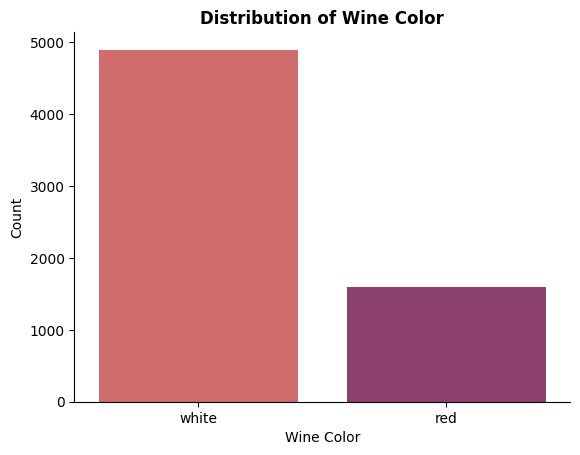

In [12]:
# create plot
ax = sns.countplot(data=wine_df, x="color", palette="flare")

# plot customization
# ax.set_xticklabels(["Malignant", "Benign"])
ax.set_xlabel("Wine Color")
ax.set_ylabel("Count")
ax.set_title("Distribution of Wine Color", fontweight="bold")

# remove the top and right spines
sns.despine()

# show plot
plt.show()

In [13]:
# numerical counts
wine_df["color"].value_counts(normalize=True)

color
white    0.754
red      0.246
Name: proportion, dtype: float64

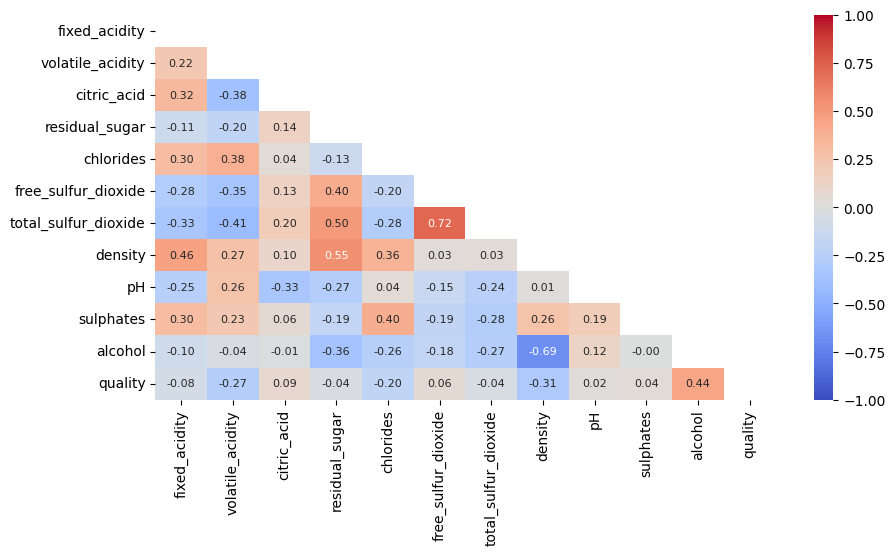

In [14]:
# create correlation matrix for features
corr_matrix = wine_df.drop(columns="color").corr()

# visualize correlation matrix
plt.figure(figsize=(10, 5))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', 
            vmin=-1, vmax=1, 
            annot_kws={"size": 8, "ha": 'center',"va": 'center'}, fmt='.2f', 
            mask=np.triu(np.ones_like(corr_matrix, dtype=bool)))

# show plot
plt.show()

In [15]:
# plt.style.use("ggplot")

# # temporary dataframe copy for visualization



# sns.pairplot(wine_df,
#              corner=True,
#              diag_kind="hist", 
#              markers="+",
#              hue="color")

# plt.show()

# # reset the plotting style
# plt.style.use("default")

In [16]:
# correlation of target with features
target_to_feature_corr = wine_df.drop(columns="color").corr()[["quality"]].iloc[:-1,:].round(2)

# adding background gradient to correlation coefficients
target_to_feature_corr.style.background_gradient(cmap="coolwarm", vmin=-1, vmax=1)\
                            .highlight_min(color='darkblue')\
                            .highlight_max(color='darkred')\
                            .format("{:.2f}")

,quality
fixed_acidity,-0.08
volatile_acidity,-0.27
citric_acid,0.09
residual_sugar,-0.04
chlorides,-0.20
free_sulfur_dioxide,0.06
total_sulfur_dioxide,-0.04
density,-0.31
pH,0.02
sulphates,0.04


In [17]:
features = list(schema.features.keys())
target = list(schema.target.keys())

print(f"The features are:\n{features}")
print(f"The target column is: {target}")

The features are:
['fixed_acidity', 'volatile_acidity', 'citric_acid', 'residual_sugar', 'chlorides', 'free_sulfur_dioxide', 'total_sulfur_dioxide', 'density', 'pH', 'sulphates', 'alcohol', 'color']
The target column is: ['quality']


In [18]:
num_features = []
cat_features = []

for feature in schema.features.keys():
    if schema.features[feature] in {"float64", "int64"}:
        num_features.append(feature)
    else:
        cat_features.append(feature)
        
print(f"The numerical features are:\n{num_features}")
print(f"The categorical features are:\n{cat_features}")

The numerical features are:
['fixed_acidity', 'volatile_acidity', 'citric_acid', 'residual_sugar', 'chlorides', 'free_sulfur_dioxide', 'total_sulfur_dioxide', 'density', 'pH', 'sulphates', 'alcohol']
The categorical features are:
['color']


In [19]:
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline

In [20]:
train_filepath = join(normpath(configs.train_dir), configs.train_filename)
test_filepath = join(normpath(configs.test_dir), configs.test_filename)

print(train_filepath)
print(test_filepath)

data\train\train_data.csv
data\test\test_data.csv


In [21]:
train_df = pd.read_csv(train_filepath)
test_df = pd.read_csv(test_filepath)

In [22]:
X_train, y_train = train_df[features], train_df[target]
X_test, y_test = test_df[features], test_df[target]


# view the shape of training and test set
shape_dict = {
        "X_train": X_train.shape,
        "y_train": y_train.shape,
        "X_test": X_test.shape,
        "y_test": y_test.shape
    }

# prettify the dictionary output
tbl = dict_to_table(input_dict=shape_dict,
                    column_headers=["Dataframe", "Value"])

# show output
print(tbl)

+-----------+------------+
| Dataframe | Value      |
+-----------+------------+
| X_train   | (5197, 12) |
| y_train   | (5197, 1)  |
| X_test    | (1300, 12) |
| y_test    | (1300, 1)  |
+-----------+------------+


In [23]:
num_pipeline = Pipeline(steps=[
    ("imputer",SimpleImputer(strategy='median')),
    ('scalar',StandardScaler())
    ])

In [24]:
cat_pipeline = Pipeline(steps=[
            ("imputer",SimpleImputer(strategy="most_frequent")),
            ("one_hot_encoder",OneHotEncoder()),
            ("scaler",StandardScaler(with_mean=False))
            ])

In [25]:
preprocessor = ColumnTransformer(
                [
                    ("num_pipeline", num_pipeline, num_features),
                    ("cat_pipeline", cat_pipeline, cat_features)
                ]
            )

In [26]:
X_train_normalized = preprocessor.fit_transform(X_train)
X_test_normalized = preprocessor.transform(X_test)

In [27]:
transform_configs =  read_yaml(DATA_CONFIGS).data_transformation
transform_configs

[2024-01-26 12:23:16 PM]:ProjectLogger INFO: common 32 - yaml file: conf\data_configs.yaml loaded successfully


Box({'train_dir': 'data/train/', 'normalized_X_train_filename': 'X_train_normalized.npy', 'y_train_filename': 'y_train.npy', 'test_dir': 'data/test/', 'normalized_X_test_filename': 'X_test_normalized.npy', 'y_test_filename': 'y_test.npy', 'models_dir': 'models/', 'preprocessor_filename': 'preprocessor.joblib'})

In [28]:
normalized_X_train_filepath = join(normpath(transform_configs.train_dir), transform_configs.normalized_X_train_filename) 
y_train_filepath = join(normpath(transform_configs.train_dir), transform_configs.y_train_filename)

normalized_X_test_filepath = join(normpath(transform_configs.test_dir), transform_configs.normalized_X_test_filename) 
y_test_filepath = join(normpath(transform_configs.test_dir), transform_configs.y_test_filename)


In [29]:
np.save(normalized_X_train_filepath, X_train_normalized)
np.save(normalized_X_test_filepath, X_test_normalized)
np.save(y_train_filepath, np.array(y_train.squeeze()))
np.save(y_test_filepath, np.array(y_test.squeeze()))

In [30]:
from src.utils.common import save_as_joblib

In [31]:
preprocessor_filepath = join(normpath(transform_configs.models_dir), transform_configs.preprocessor_filename)
preprocessor_filepath

'models\\preprocessor.joblib'

In [32]:
save_as_joblib(file_path=preprocessor_filepath, serialized_object=preprocessor)

[2024-01-26 12:25:17 PM]:ProjectLogger INFO: common 86 - object saved at: models\preprocessor.joblib
